In [4]:
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from dynascale.challenges.ca import CAChallenge
from dynascale.utils.ca import plot
import cellpylib as cpl

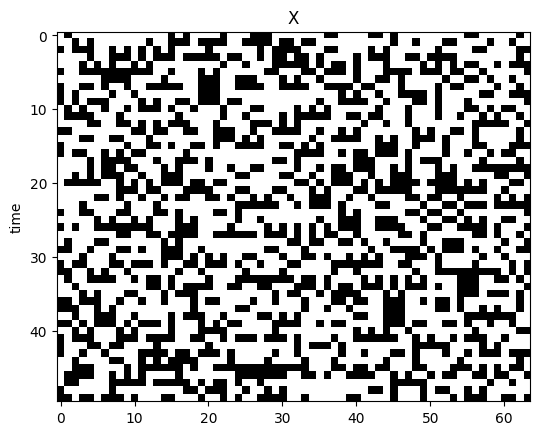

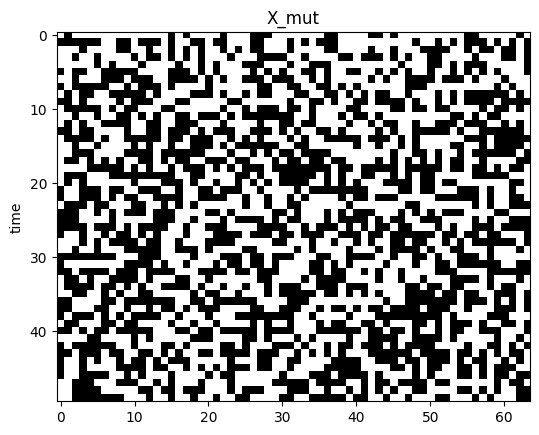

In [26]:
challenge = CAChallenge(3, 64, mutation_p=0.5)
x0 = challenge.make_init_conds(n=1)
x = challenge.make_data(x0, timesteps=50)
x_mut = challenge.make_data(x0, timesteps=50, noisy=True)
plot([x, x_mut], labels=["X", "X_mut"])